### This yolo model is used in object detection, segmentation, classification, pose estimation and tracking tasks
In object detection & segmentation, there are 80 classes.
Classification is trained on 1000 classes based on Imagenet dataset.

In [ ]:
!python --version

In [ ]:
!pip install -U ultralytics

## 1) Object Detection Task


In [ ]:
# load model
from ultralytics import YOLO
model_8n = YOLO("yolov8n.pt")
model_8x = YOLO("yolov8x.pt")

*using small nano model*

In [ ]:
#to see 80 class lists ---> model.names
print(model_8n.names)
results_model_8n = model_8n(r"/content/drive/MyDrive/DLprojects/usingYOLOv8/street.jpg", conf=0.7, save=True, save_txt=True, save_conf=True) # (classes=[0, 1])

*using xlarge model*

In [ ]:
results_model_8x = model_8n(r"/content/street.jpg", save=True)  #we can pass list of images

*access to boxes*

In [ ]:
results_model_8n = model_8n("/content/drive/MyDrive/DLprojects/usingYOLOv8/street.jpg")[0]  #boxes
print(results_model_8n.boxes) #cls / conf / data / orig_shape / shape / xywh / xywhn / xyxy/ xyxyn
print(results_model_8n.boxes.xywh[4])
x, y, w, h = results_model_8n.boxes.xywh[4]

In [ ]:
#just for test:
results_model_8n = model_8n("/content/drive/MyDrive/DLprojects/usingYOLOv8/street.jpg")[0]
print(results_model_8n.masks)  #tensor data / org_shape / shape / xy / xyn
print(results_model_8n.masks.xy[4])

## Testing the obj_det model on video

In [10]:
from ultralytics import YOLO
import cv2
import os
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# saving root
save_dir = "/content/drive/MyDrive/DLprojects/usingYOLOv8"
os.makedirs(save_dir, exist_ok=True)

In [11]:
video_path = "/content/drive/MyDrive/DLprojects/usingYOLOv8/nightstreet.mp4"
output_path = "/content/drive/MyDrive/DLprojects/usingYOLOv8"

In [12]:
# Load model
model = YOLO("yolov8n.pt")

In [13]:
# Prepare video writer
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))

In [ ]:
# Running the model on video frame by frame:
results = model(video_path, stream=True)  # one frame
for frame in results:     #r---> r.orig_img / r.boxes / r.masks	/ r.probs / r.names / r.plot()  for each frame
    frame = frame.plot()  # returns the image of each video frame in color with identified boxes.
    out.write(frame)      #Saves the processed frame in the final video.
#Close sources:
cap.release()
out.release()

### The second way of using model: windows commandLine

In [ ]:
yolo detect predict model=yolov8n.pt source='street.jpg'
#    task / use_or_train_model / model_name / input

----------------------------------------------------------------------------
# 2) Instance Segmentation Task



In [ ]:
seg_model = YOLO("yolov8n-seg.pt")

### show masks

In [ ]:
import matplotlib.pyplot as plt

# Use predict() and explicitly set show=False, save=False, visualize=False
results = seg_model.predict(
    source="/content/drive/MyDrive/DLprojects/usingYOLOv8/street.jpg",
    show=False,
    save=False,
    visualize=False,
    stream=False  # set to False so it returns a list directly
)

# Now extract the second mask
my_mask = results[0].masks.data[6].cpu().numpy()

# Display the mask
plt.imshow(my_mask, cmap='gray')
plt.axis('off')
plt.title('Instance Mask')
plt.show()

### The second way of using model: windows commandLine

In [ ]:
yolo segment predict model=yolov8n-seg.pt source='street.jpg'

----------------------------------------------------------------------------
# 3) Classification Task

In [ ]:
from ultralytics import YOLO
cls_model = YOLO("yolov8n-cls.pt")
result = cls_model("/content/drive/MyDrive/DLprojects/usingYOLOv8/dg.jpg")[0] #[0] probs
print(result)

In [ ]:
index = result.probs.top1 #285
print(result.names[index])  #egyptian cat

In [28]:
top5classes = result.probs.top5
print(top5classes)

[207, 852, 235, 263, 264]


In [29]:
top5classes = result.probs.top5conf
print(top5classes)  #[probabilities of 5 top classes]

tensor([0.7913, 0.0585, 0.0175, 0.0173, 0.0150], device='cuda:0')


### The second way of using model: windows commandLine

In [ ]:
yolo classify predict model=yolov8n-cls.pt source='cat.jpg'

----------------------------------------------------------------------------
# 4) Pose Estimation Task

In [ ]:
from ultralytics import YOLO
pose_model = YOLO("yolov8n-pose.pt")
result = pose_model("/content/drive/MyDrive/DLprojects/usingYOLOv8/running.jpg", show=True)

In [ ]:
# access to key points:
result = pose_model("/content/drive/MyDrive/DLprojects/usingYOLOv8/running.jpg")[0]
print(result.keypoints.conf)  # conf / xy /xyn
print(result.keypoints.xy.shape)  #[2 (person), 17 (keypoints), 2 (x,y)]


image 1/1 /content/drive/MyDrive/DLprojects/usingYOLOv8/running.jpg: 448x640 2 persons, 10.2ms
Speed: 4.3ms preprocess, 10.2ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)


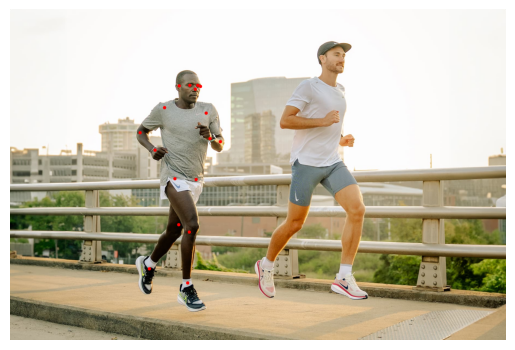

In [43]:
# draw 17 key points on img
from matplotlib import pyplot as plt

img = cv2.imread("/content/drive/MyDrive/DLprojects/usingYOLOv8/running.jpg")
result = pose_model("/content/drive/MyDrive/DLprojects/usingYOLOv8/running.jpg")[0]
kp = result.keypoints.xy.cpu().numpy()

human_1 = kp[0]

for x , y in human_1:
  cv2.circle(img, (int(x), int(y)), 6, (0, 0, 255), -1)

# Convert BGR to RGB for correct color display
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### The second way of using model: windows commandLine

In [ ]:
yolo pose predict model=yolov8n-pose.pt source='running.jpg'

----------------------------------------------------------------------------
# 5) Tracking Task

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
result = model.track("/content/drive/MyDrive/DLprojects/usingYOLOv8/wolfs.mp4", show=True, persist=True, save=True)

### The second way of using model: windows commandLine

In [ ]:
yolo track model=yolov8n.pt source='wolfs.mp4' show=True

---
# Note: several ways to read image and videos


In [ ]:
source = cv2.imread("path")

source = ("url")

source = np.random.randint(low=0, high=255, size=(460, 460, 3)), dtype='unit8'


results = model(source, stream=True)